# Variables Categóricas

Entonces ya aprendimos a usar:
* `replot()` para representar las **relaciones entre las variables**
* `displot()` para las **distribuciones de los datos**

Ahora le toca el turno a `catplot()` para representar las **categorías de las variables**.


### Uso de catplot()

A través de `catplot()` podemos acceder a varios tipos de gráficos que están orientados hacia la visualización de datos categóricos. Estos gráficos ofrecen diferentes niveles de **granularidad**, es decir, *qué tan profundamente podemos establecer niveles de categorías*.

Como puedes ver en la siguiente imagen, `catplot()` dispone de muchas opciones, como `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `pointplot` y `barplot`.

![](funciones_seaborn.png)

Vamos a trabajar nuevamente con la base de datos de **propinas** para investigar cómo se comportan cada uno de estos gráficos.

In [1]:
import seaborn as sns

In [2]:
propinas = sns.load_dataset("tips")

---

### Crear un stripplot con catplot()

Vamos a usar el parametro `kind` con el argumento `"strip"` para crear el **dtripplot**:

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


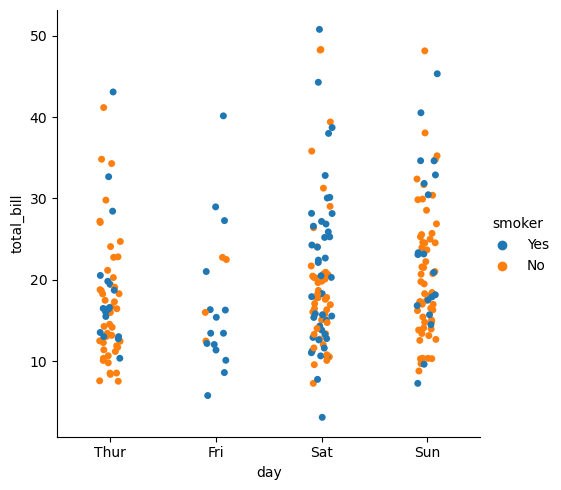

In [3]:
sns.catplot(data=propinas,
           kind="strip",
           x="day",
           y="total_bill",
           hue="smoker");

---

Un `stripplot` básicamente es un **gráfico de dispersión** para una variable categórica, como **"día"** en este caso.

Los puntos se dibujan a lo largo de un eje que representa la **categoría día**, pero aunque se ajustan aleatoriamente a lo largo del eje categórico para evitar superposiciones exactas, pueden solaparse parcialmente. Esto hace que el `stripplot` sea útil para mostrar las distribuciones de los datos respecto a las categorías, pero puede ser difícil de interpretar cuando los conjuntos de datos son grandes debido al solapamiento de los puntos.

### Crear un swarmplot con catplot()

El siguiente gráfico permite resolver la desventaja mencionada en el párrafo anterior. Para crearlo cambiamos el valor de `kind` a `"swarm"`.

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


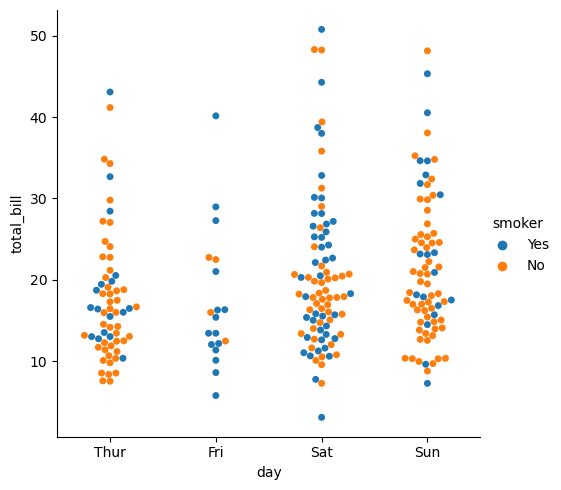

In [4]:
sns.catplot(data=propinas,
           kind="swarm",
           x="day",
           y="total_bill",
           hue="smoker");

---

Un `swarmplot` es muy parecido al `stripplot`, pero lo mejora **ajustando la posición de los puntos** a lo largo del eje categórico para **evitar cualquier solapamiento**.

Esto significa que el `swarmplot` esparce los puntos de manera uniforme a lo largo del eje, y así facilita la visualización de cada punto individualmente y proporciona una representación más clara de la distribución de los datos.

Sin embargo, hay que tener en cuenta que debido a este ajuste, los `swarmplots` pueden ser computacionalmente más intensivos (más pesados), especialmente con grandes conjuntos de datos, y pueden tener problemas para acomodar un número muy grande de observaciones.

Podríamos decir que lo importante a la hora de elegir entre un `stripplot` y un `swarmplot` va a depender de:
* Si tu conjunto de datos es relativamente grande y estás más interesado en una representación general rápida que en la precisión de cada punto, deberías usar un `stripplot`.
* Si es importante para tu análisis visualizar la distribución de todos los puntos individuales sin solapamiento, y el conjunto de datos es de un tamaño manejable, entonces conviene el `swarmplot`.

### Crear un boxplot con catplot()

Ahora vamos a mostrar estos mismos datos con otro de los gráficos a los que podemos acceder con `catplot()`, al que configuramos con el valor `box` en el parámetro `kind`.

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


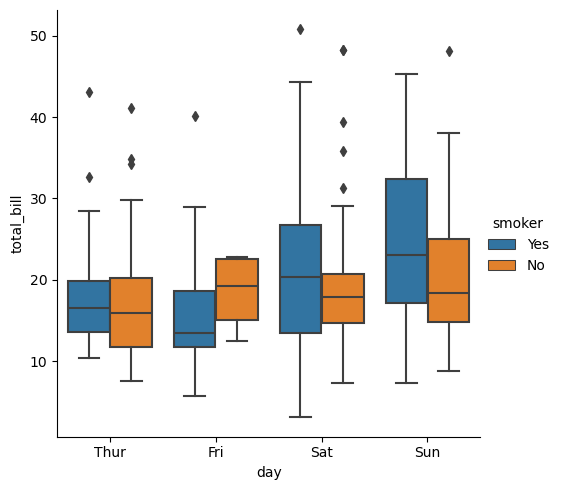

In [5]:
sns.catplot(data=propinas,
           kind="box",
           x="day",
           y="total_bill",
           hue="smoker");

---

El `boxplot`, también conocido como **diagrama de caja y bigotes**, nos brinda una serie de elementos para comprender la distribución de las variables categóricas de un modo bastante completo. Veamos cuáles son sus componentes.

##### Componentes de un Boxplot
- **Caja**: La caja del gráfico representa los cuartiles medios del conjunto de datos, con el borde inferior de la caja representando el primer cuartil (25%), y el borde superior representando el tercer cuartil (75%). La mediana (el segundo cuartil, que divide los datos en la mitad) se marca usualmente con una línea dentro de la caja.
- **Bigotes**: Los "bigotes" se extienden desde la caja hasta los valores más altos y más bajos, excluyendo los valores atípicos. Los datos que se encuentran fuera de este rango marcado por el bigote, se consideran valores atípicos.
- **Valores Atípicos**: Los valores atípicos se representan como puntos individuales que caen fuera del alcance de los bigotes. Estos puntos destacan las observaciones que son inusualmente altas o bajas en comparación con el resto del conjunto de datos.

#### Interpretación de un Boxplot
El `boxplot` nos brinda mucha información, a la que podríamos interpretar de la siguiente manera:
- **Dispersión**: El rango intercuartílico (IQR) refleja la dispersión de la mitad central de los datos. Una IQR grande indica una mayor dispersión.
- **Simetría**: Si la línea de la mediana no está en el centro de la caja, indica que los datos están sesgados. Si la mediana está más cerca del primer cuartil, los datos están sesgados hacia la derecha; si está más cerca del tercer cuartil, están sesgados hacia la izquierda.
- **Valores Atípicos**: Los valores atípicos pueden indicar variabilidad en los datos o errores de medición.
- **Comparaciones entre Grupos**: Los `boxplots` son particularmente útiles para comparar las distribuciones entre varios grupos o categorías de datos.


### Crear un violinplot con catplot()

El siguiente tipo de gráfico que podemos crear con `catplot()` son los gráficos de violín, colocando el valor `violin` en el parámetro `kind`.

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


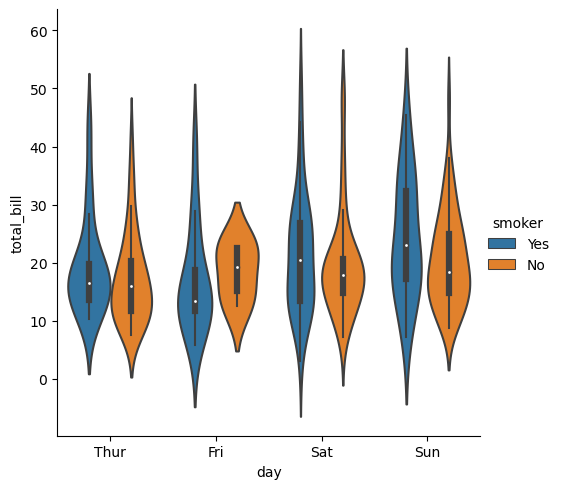

In [6]:
sns.catplot(data=propinas,
           kind="violin",
           x="day",
           y="total_bill",
           hue="smoker");

---

El `violinplot`, o **gráfico de violín**, se llama así porque la forma de sus manchas de datos la mayoría de las veces se ven bastante parecidas a un violín.

Como puedes ver tiene algunos parecidos con el `boxplot`, porque nos muestra la mediana y los cuartiles, y porque los datos se agrupan dentro de una forma geométrica, solo que aquí en vez de ser una caja rectangular, su grosor representa la cantidad de repeticiones para los valores del **eje y**.

También tiene algunos aspectos del `KDE` (que es la Estimación de Densidad Kernel que vimos en la lección anterior), porque incluye una línea que muestra las frecuencias, como lo hace `KDE` al mostrar distribuciones en `displot()`, pero en este caso la linea está rotada verticalmente, y duplicada simétricamente (a lo largo del eje de las variables categóricas), lo que resulta en esta forma que recuerda a un violín. Esta característica única permite que el `violinplot` muestre la densidad de los datos en diferentes valores, y que de esa manera nos ofrezca una visión más profunda de la distribución que un `boxplot` tradicional.


### Crear un pointplot con catplot()
Ahora veamos el penúltimo gráfico al que podemos acceder con `catplot()`, que es el `pointplot`, y al que podemos configurar modificando `kind` con el argumento `point`.

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


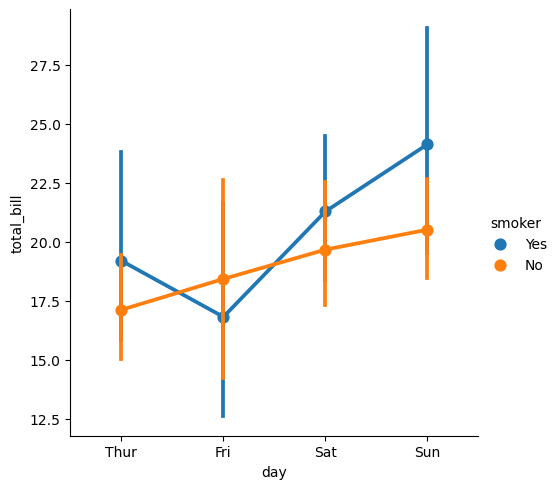

In [7]:
sns.catplot(data=propinas,
           kind="point",
           x="day",
           y="total_bill",
           hue="smoker");

---

El `pointplot` es un tipo de gráfico ofrecido por Seaborn que se utiliza para **mostrar estimaciones puntuales** junto a sus **intervalos de confianza** utilizando marcadores de puntos. 

En este caso, cada punto en el gráfico representa el promedio de lo que se gasta en las facturas totales de los clientes, y las líneas conectan estos puntos a lo largo de los días de la semana (de jueves a domingo).

Los dos colores diferentes de puntos y líneas muestran la diferencia entre los grupos de fumadores y no fumadores.

Si, por ejemplo, los puntos que representan a los fumadores están generalmente más altos que los de los no fumadores en ciertos días, eso significa que, en promedio, los fumadores gastaron más dinero esos días. 

Y por último, las líneas verticales que salen de los puntos nos dan una idea de cuán seguros podemos estar sobre estos promedios: una línea larga significa que hay más variabilidad en lo que la gente gastó, mientras que una línea corta significa que los gastos están más agrupados alrededor del promedio.


### Crear un barplot con catplot()
Finalmente veamos la última opción que nos brinda `catplot()`, que son los gráficos de barras, o `barplots`, y que se configuran con el valor `bar` en el parámetro `kind`.

c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


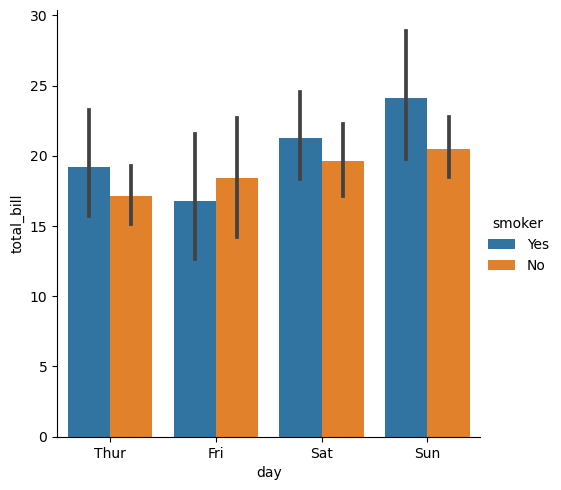

In [8]:
sns.catplot(data=propinas,
           kind="bar",
           x="day",
           y="total_bill",
           hue="smoker");

---

Los `barplots` son una forma común y directa de visualizar datos, porque muestran la **relación que existe entre una variable categórica y una variable numérica**. Cada barra en el gráfico representa una categoría y la altura de la barra indica el valor numérico asociado.

Pero como elemento extra, además de las barras, Seaborn calcula y muestra una pequeñas **líneas negras** en la parte superior de cada barra, que representan los intervalos de confianza para cada barra. Esto nos brinda una idea del rango de incertidumbre alrededor de la estimación estadística. ¿Qué significa esto? Que si esa línea cubre un espacio muy pequeño, entonces significa que estamos bastante seguros de que nuestra barra tiene la altura correcta. Si la línea cubre un espacio más grande, significa que no estamos tan seguros de la altura exacta de nuestra barra, y que por lo tanto podría ser un poco más alta o un poco más baja.


### Lo que sigue
Con esto hemos cubierto todas las posibilidades que nos ofrece `catplot()`, y a la vez hemos terminado de ver las 3 funciones generales de Seaborn para crear gráficos.

¿Con esto hemos agotado lo que Seaborn tiene para darnos? Por supuesto que no, así que te espero en la siguiente lección para seguir sorprendiéndote.